In [13]:
##!!!!!!!!Works with python 3.8, numpy 1.20.1 or 1.19.2 or 1.16.2 (this) and nbeats-forecast 1.3.7!!!!!!!!!!!
import os
import numpy as np
import pandas as pd
from torch import optim
import matplotlib.pyplot as plt
from nbeats_forecast import NBeats
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
#Load data
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL_NBeats.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
data = pd.read_csv(os.path.basename(file))
data = data.values        #univariate time series data of shape nx1 (numpy array)

In [15]:
#Default Setting
model = NBeats(data=data, period_to_forecast=194, train_percent=0.75,
               backcast_length=25)#, thetas_dims=[2,8], nb_blocks_per_stack=3)
model.fit(epoch=100, verbose=3)#optimiser=optim.AdamW(model.parameters,
#            lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False))
forecast = model.predict()

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=194, share_thetas=False) at @2845648670784
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=194, share_thetas=False) at @2847488996976
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=194, share_thetas=False) at @2845648671072
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=194, share_thetas=False) at @2845648671648
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=194, share_thetas=False) at @2845648671888
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=194, share_thetas=False) at @2845648672368
grad_step = 009630, tr_loss = 0.005233, te_loss = 0.543658
grad_step = 009660, tr_loss = 0.005225, te_loss = 0.54365

In [16]:
y_test = data[-194:, :]
#print(y_test)
rmse = mean_squared_error(y_test, forecast , squared=False)
mae = mean_absolute_error(y_test, forecast)
print("Rmse:" + str(rmse))
print("Mae: " + str(mae))

Rmse:1206.1996422933887
Mae: 858.5738110099871


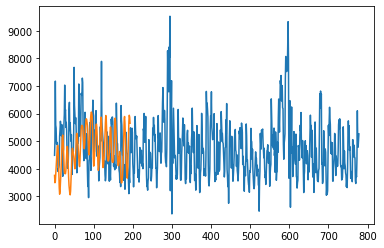

In [17]:
plt.plot(data)
#
plt.plot(forecast)
plt.show()

In [18]:
out = np.array(forecast, dtype=int)
out.round()
print(out)
#np.savetxt(r"C:\Users\gurpr\Videos\BetaSci\NBeats_Epocs1000_bl25_td72-8_hl128_wd001_lr0001_betas09-0.999.csv", out, delimiter=",", fmt='%.0i')

[[3758]
 [3492]
 [3535]
 [3796]
 [4059]
 [4364]
 [4611]
 [4785]
 [4844]
 [4728]
 [4369]
 [3830]
 [3313]
 [3076]
 [3166]
 [3427]
 [3760]
 [4112]
 [4513]
 [4886]
 [5165]
 [5220]
 [5036]
 [4615]
 [4172]
 [3889]
 [3837]
 [3818]
 [3823]
 [3941]
 [4224]
 [4573]
 [4811]
 [4802]
 [4545]
 [4108]
 [3683]
 [3390]
 [3231]
 [3102]
 [3053]
 [3190]
 [3593]
 [4078]
 [4496]
 [4700]
 [4745]
 [4656]
 [4563]
 [4452]
 [4293]
 [4090]
 [3998]
 [4155]
 [4559]
 [4976]
 [5254]
 [5285]
 [5176]
 [5020]
 [4856]
 [4647]
 [4385]
 [4142]
 [4077]
 [4285]
 [4705]
 [5144]
 [5431]
 [5568]
 [5568]
 [5560]
 [5508]
 [5389]
 [5117]
 [4838]
 [4723]
 [4877]
 [5188]
 [5508]
 [5725]
 [5809]
 [5792]
 [5694]
 [5575]
 [5335]
 [4970]
 [4613]
 [4501]
 [4669]
 [5045]
 [5446]
 [5788]
 [5975]
 [6054]
 [6021]
 [5907]
 [5529]
 [4978]
 [4401]
 [4094]
 [4122]
 [4391]
 [4705]
 [5036]
 [5318]
 [5530]
 [5617]
 [5521]
 [5172]
 [4650]
 [4156]
 [3942]
 [4067]
 [4363]
 [4685]
 [4995]
 [5372]
 [5685]
 [5871]
 [5763]
 [5353]
 [4762]
 [4242]
 [4041]
